Introduction to machine learning

The Car Price Prediction Model is a supervised machine learning regression task aimed at predicting the selling price of a car based on several input features. These features may include the car name, car's manufacture year, kilometer driven, present size, tranmission, fuel type, brand, and other technical specifications. By using historical data, the model learns the relationship between these features and the car prices, allowing it to make accurate predictions for new, unseen data. This project is commonly used to explore data preprocessing, feature engineering, and regression algorithms like Random forest regression, or XGBoost

objectives

	Predict Selling Price of a used car based on input features.
    Improve prediction accuracy over simpler models (e.g., Linear Regression).
	Handle categorical and numerical variables without extensive preprocessing.
	Build a robust model that generalizes well to unseen data.
	Support informed decision-making for car buyers, sellers, and dealerships.

Building a random forest regression model¶
Now that we have an understanding of how random forests work, let's implement one using scikit-learn.

Import libraries and data

In [50]:
#import the libraries 
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt

In [8]:
import os

In [11]:
#trying to know the pathway of the car dataset
print(os.listdir())

['.ipynb_checkpoints', 'car price prediction model.ipynb', 'car_data', 'car_data.zip']


In [ ]:
# load the dataset

In [13]:
df = pd.read_csv("car_data/car_data.csv")

In [15]:
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [ ]:
#handling categorical variables

In [29]:
df = pd.get_dummies(df, drop_first=True)

In [31]:
X = df.drop(["Selling_Price"], axis=1)
y = df["Selling_Price"]

In [33]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=42)

In [52]:
# Our forest consists of 100 trees with a random_state of 42 
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [ ]:
### Testing

To evaluate the performance of our model, we can report the **mean squared error** or **plot** predicted output vs. Actual output.

In [37]:
y_pred = model.predict(X_test)
print("R2 score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.9673373873539192
RMSE: 0.8674113062799534


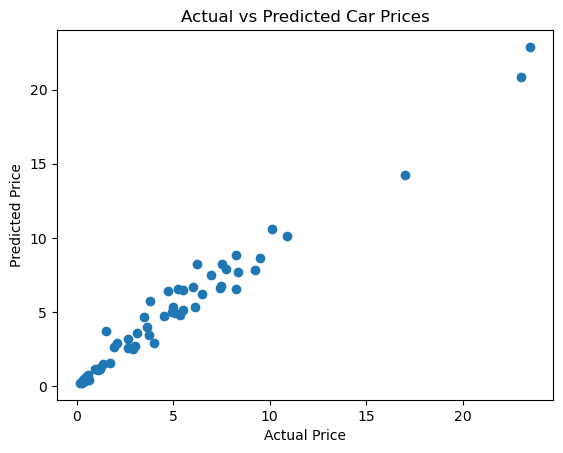

In [39]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices")
plt.show()

CONCLUSION

In this project, we built a machine learning model to predict the selling price of cars based on features such as present price, kilometers driven, fuel type, transmission, owner and selling type. After preprocessing the data and exploring relationships between features,I trained two models: Linear Regression and Random Forest Regressor, but the linear regression result was approximately 0.599 which was not even closer to 1.0(i.e 100%) for the R2 score and the RMSE gave a higher result of 3.034. while the random forest regressor gave an outstanding result of 0.96 for the R2 score and 0.86 for the RMSE, the random forest regressor outperformed it because it has higher R2 score and a lower RMSE, i.e more accurate price predictions
Random Forest handles non-linear relationships, interactions between variables, and is robust to outliers, making it a better fit for this dataset.